Tasks To Be Performed:
1. Data Analysis:
    a. Import the dataset
    b. Get information about the dataset (mean, max, min, quartiles etc.)
    c. Find the correlation between all fields
2. Data Visualization:
    a. Visualize the number of patients having a heart disease and not having
    a heart disease
    b. Visualize the age and whether a patient has disease or not
    c. Visualize correlation between all features using a heat map
3. Logistic Regression:
    a. Build a simple logistic regression model:
    i. Divide the dataset in 70:30 ratio
    ii. Build the model on train set and predict the values on test set
    iii. Build the confusion matrix and get the accuracy score
4. Decision Tree:
    a. Build a decision tree model:
    i. Divide the dataset in 70:30 ratio
    ii. Build the model on train set and predict the values on test set
    iii. Build the confusion matrix and calculate the accuracy
    iv. Visualize the decision tree using the Graphviz package
5. Random Forest:
    a. Build a Random Forest model:
    i. Divide the dataset in 70:30 ratio
    ii. Build the model on train set and predict the values on test set
    iii. Build the confusion matrix and calculate the accuracy
    iv. Visualize the model using the Graphviz package
6. Select the best model
    a. Print the confusion matrix of all classifiers
    b. Print the classification report of all classifiers
    c. Calculate Recall Precision and F1 score of all the models
    d. Visualize confusion matrix using heatmaps
    e. Select the best model based on the best accuracies

In [45]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [46]:
diabetes = pd.read_csv('diabetes.csv')

In [47]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
diabetes.shape

(768, 9)

In [51]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [52]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


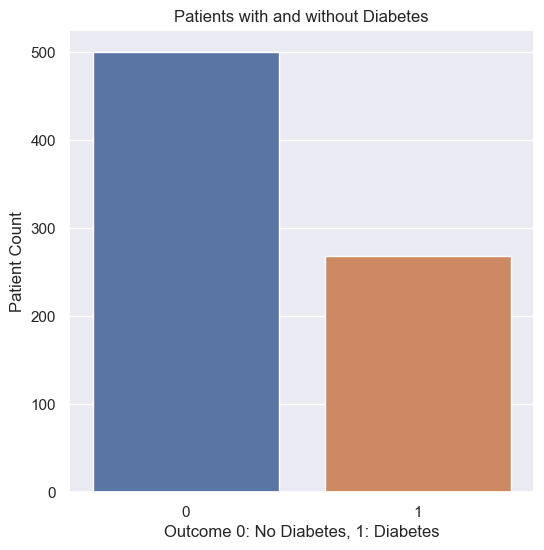

In [53]:
sns.set(style = "darkgrid")
plt.figure(figsize = (6,6))
sns.countplot(data = diabetes, x = 'Outcome')
plt.xlabel("Outcome 0: No Diabetes, 1: Diabetes")
plt.ylabel("Patient Count")
plt.title("Patients with and without Diabetes")
plt.show()

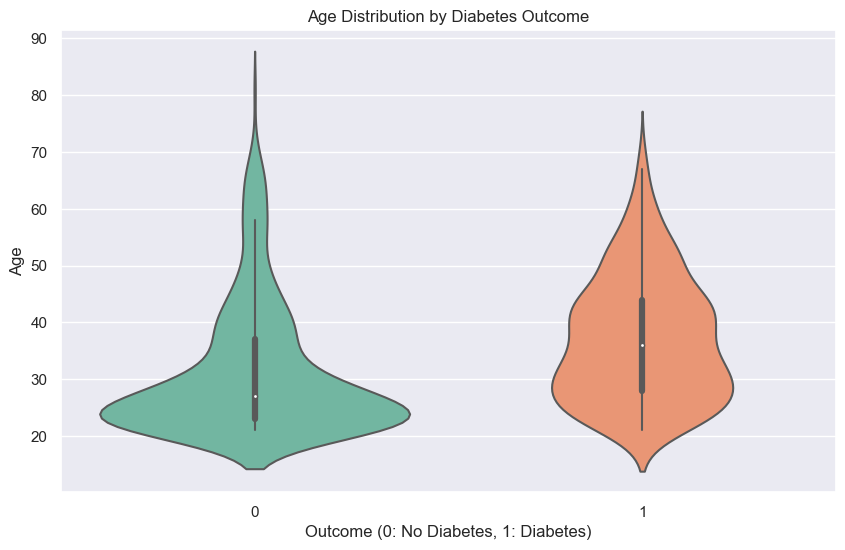

In [54]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.violinplot(x='Outcome', y='Age', data=diabetes, palette='Set2')

plt.title('Age Distribution by Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Age')

plt.show()

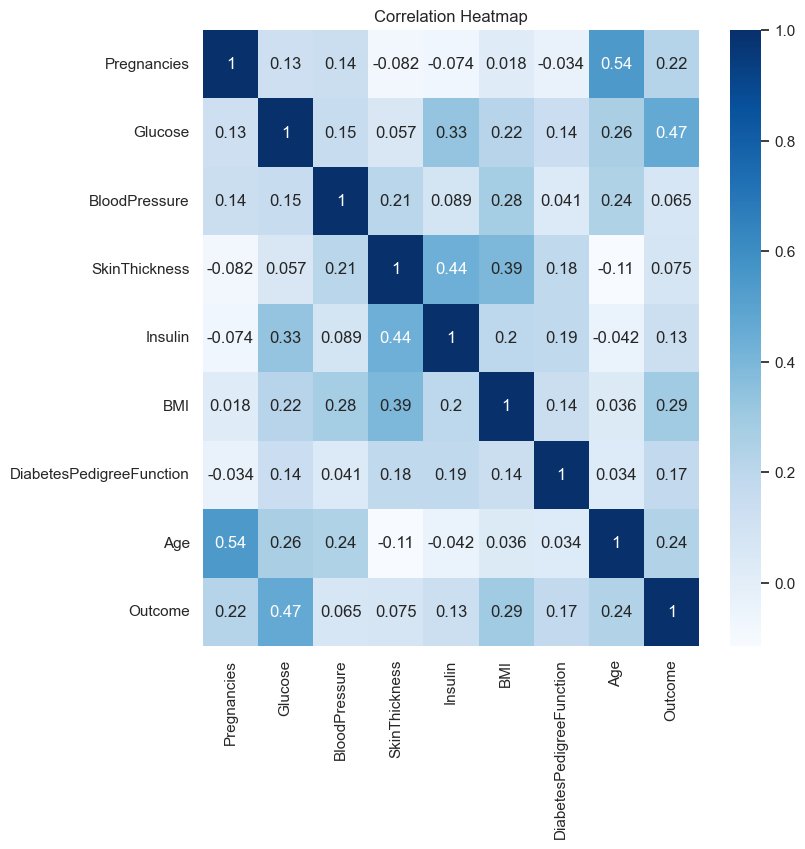

In [55]:
plt.figure(figsize =(8,8))
sns.heatmap(diabetes.corr(), cmap = 'Blues', annot = True)
plt.title("Correlation Heatmap")
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
X = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 12)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

In [58]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

C:\Users\Onkar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
models = [logreg_model, dt_model, rf_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

In [60]:
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{name}:\nConfusion Matrix:\n{conf_matrix}\nAccuracy: {accuracy:.4f}")


Logistic Regression:
Confusion Matrix:
[[132  15]
 [ 33  51]]
Accuracy: 0.7922

Decision Tree:
Confusion Matrix:
[[113  34]
 [ 33  51]]
Accuracy: 0.7100

Random Forest:
Confusion Matrix:
[[128  19]
 [ 36  48]]
Accuracy: 0.7619


In [61]:
dot_data_dt = export_graphviz(dt_model, out_file=None, feature_names=list(X.columns), class_names=list(map(str, dt_model.classes_)), filled=True, rounded=True)
graph_dt = graphviz.Source(dot_data_dt)
graph_dt.render("decision_tree")

graph_dt.view()



'decision_tree.pdf'

In [62]:
dot_data_rf = export_graphviz(rf_model.estimators_[0], out_file=None, feature_names=list(X.columns), class_names=list(map(str, rf_model.classes_)), filled=True, rounded=True)
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree")


graph_rf.view()

'random_forest_tree.pdf'

In [63]:
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    
    print(f"\n{name}:\nClassification Report:\n{report}")


Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       147
           1       0.77      0.61      0.68        84

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231


Decision Tree:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       147
           1       0.60      0.61      0.60        84

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.71      0.71      0.71       231


Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       147
           1       0.72      0.57      0.64        84

    accuracy                           0.76       231
   ma

In [64]:
metrics_dict = {'Recall': [], 'Precision': [], 'F1 Score': []}
for model in models:
    y_pred = model.predict(X_test)
    recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
    precision = classification_report(y_test, y_pred, output_dict=True)['1']['precision']
    f1_score = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']
    
    metrics_dict['Recall'].append(recall)
    metrics_dict['Precision'].append(precision)
    metrics_dict['F1 Score'].append(f1_score)

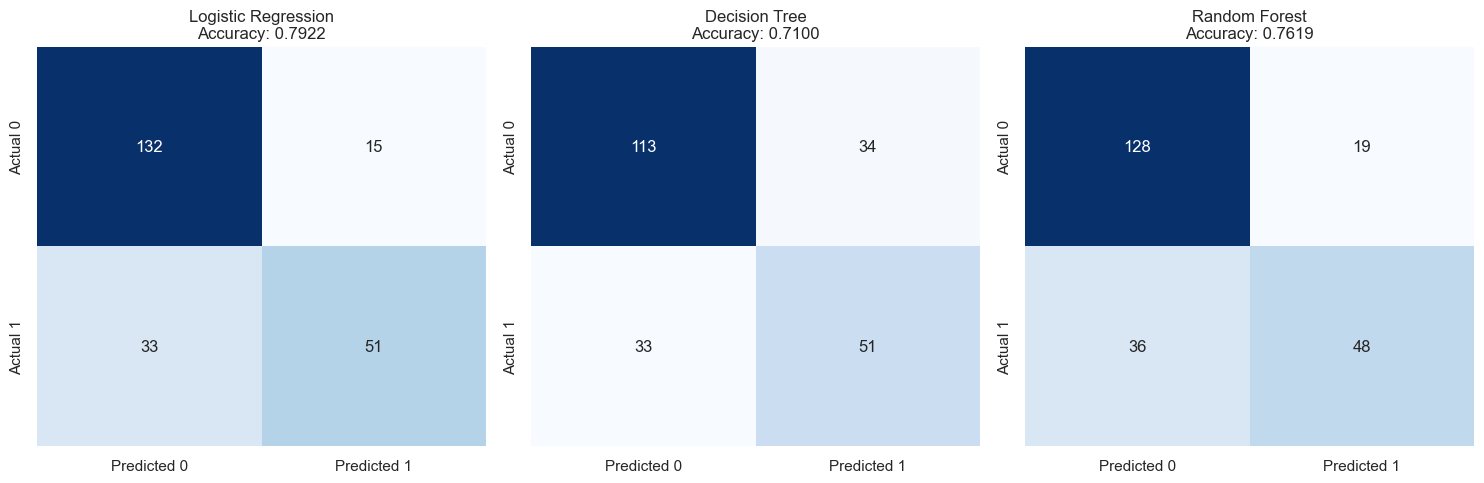

In [65]:
plt.figure(figsize=(15, 5))
for i, (model, name) in enumerate(zip(models, model_names), 1):
    plt.subplot(1, 3, i)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"{name}\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

plt.tight_layout()
plt.show()

In [66]:
best_model_index = max(range(len(models)), key=lambda i: accuracy_score(y_test, models[i].predict(X_test)))
best_model = models[best_model_index]
best_model_name = model_names[best_model_index]

print(f"\nBest Model: {best_model_name} with Accuracy: {accuracy_score(y_test, best_model.predict(X_test)):.4f}")


Best Model: Logistic Regression with Accuracy: 0.7922
